**Exercise**

# Exploring categorical features

The Gapminder dataset that you worked with in previous chapters also contained a categorical `'Region'` feature, which we dropped in previous exercises since you did not have the tools to deal with it. Now however, you do, so we have added it back in!

Your job in this exercise is to explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.

**Instruction**

- Import `pandas` as `pd`.
- Read the CSV file `'gapminder.csv'` into a DataFrame called `df`.
- Use pandas to create a boxplot showing the variation of life expectancy (`'life'`) by region (`'Region'`). To do so, pass the column names in to `df.boxplot()` (in that order).

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from urllib.request import urlretrieve
fn = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1939/datasets/gm_2008_region.csv'
urlretrieve(fn, 'gapminder.csv')


('gapminder.csv', <http.client.HTTPMessage at 0x7f2497efe390>)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


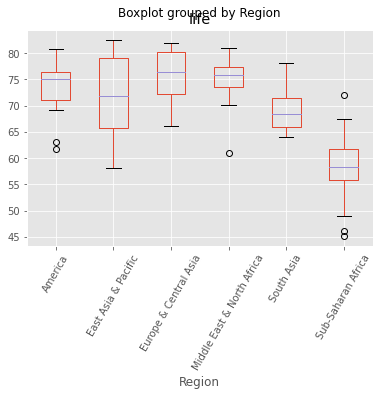

In [2]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()


**Exercise**

# Creating dummy variables

As Andy discussed in the video, scikit-learn does not accept non-numerical features. You saw in the previous exercise that the `'Region'` feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the `'Region'` feature. To do this, you need to binarize it by creating dummy variables, which is what you will do in this exercise.

**Instruction**

- Use the pandas `get_dummies()` function to create dummy variables from the `df` DataFrame. Store the result as `df_region`.
- Print the columns of `df_region`. This has been done for you.
- Use the `get_dummies()` function again, this time specifying `drop_first=True` to drop the unneeded dummy variable (in this case, `'Region_America'`).
- Hit 'Submit Answer to print the new columns of `df_region` and take note of how one column was dropped!

In [3]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)


Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


**Exercise**

# Regression with categorical features

Having created the dummy variables from the `'Region'`feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.

The feature array `X` and target variable array `y` have been pre-loaded.

**Instruction**

- Import `Ridge` from `sklearn.linear_model` and `cross_val_score` from `sklearn.model_selection`.
- Instantiate a ridge regressor called `ridge` with `alpha=0.5` and `normalize=True`.
- Perform 5-fold cross-validation on `X` and `y` using the `cross_val_score()` function.
- Print the cross-validated scores.

In [4]:
# modified/added by Jinny
import pandas as pd
import numpy as np

from urllib.request import urlretrieve

fn = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1939/datasets/gm_2008_region.csv'
urlretrieve(fn, 'gapminder.csv')

df = pd.read_csv('gapminder.csv')

df_region = pd.get_dummies(df)

df_region = df_region.drop('Region_America', axis=1)

X = df_region.drop('life', axis=1).values

y = df_region['life'].values


In [5]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)


[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

**Exercise**

# Dropping missing data

The voting dataset from Chapter 1 contained a bunch of missing values that we dealt with for you behind the scenes. Now, it's time for you to take care of these yourself!

The unprocessed dataset has been loaded into a DataFrame `df`. Explore it in the IPython Shell with the `.head()`method. You will see that there are certain data points labeled with a `'?'`. These denote missing values. As you saw in the video, different datasets encode missing values in different ways. Sometimes it may be a `'9999'`, other times a `0` - real-world data can be very messy! If you're lucky, the missing values will already be encoded as `NaN`. We use `NaN`because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as `.dropna()` and `.fillna()`, as well as scikit-learn's Imputation transformer `Imputer()`.

In this exercise, your job is to convert the `'?'`s to NaNs, and then drop the rows that contain them from the DataFrame.

**Instruction**

- Explore the DataFrame `df` in the IPython Shell. Notice how the missing value is represented.
- Convert all `'?'` data points to `np.nan`.
- Count the total number of NaNs using the `.isnull()` and `.sum()` methods. This has been done for you.
- Drop the rows with missing values from `df` using `.dropna()`.
- Hit 'Submit Answer' to see how many rows were lost by dropping the missing values.

In [6]:
# modified/added by Jinny
import numpy as np
import pandas as pd
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_1939/datasets/house-votes-84.csv',
 header=None, names = ['infants', 'water', 'budget', 'physician', 'salvador', 'religious',
 'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education',
 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'])

df = df.reset_index()
df.rename(columns = {'index': 'party'}, inplace = True)

df[df == 'y'] = 1
df[df == 'n'] = 0

In [7]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))


party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


**Exercise**

# Imputing missing data in a ML Pipeline I

As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or [SVM](http://scikit-learn.org/stable/modules/svm.html). For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same `.fit()` and `.predict()` methods as before.

**Instruction**

- Import `Imputer` from `sklearn.preprocessing` and `SVC` from `sklearn.svm`. SVC stands for Support Vector Classification, which is a type of SVM.
- Setup the Imputation transformer to impute missing data (represented as `'NaN'`) with the `'most_frequent'`value in the column (`axis=0`).
- Instantiate a `SVC` classifier. Store the result in `clf`.
- Create the steps of the pipeline by creating a list of tuples:
  - The first tuple should consist of the imputation step, using `imp`.
  - The second should consist of the classifier.

In [8]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

ImportError: ignored

**Exercise**

# Imputing missing data in a ML Pipeline II

Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You can use the `.fit()` and `.predict()` methods on pipelines just as you did with your classifiers and regressors!

Practice this for yourself now and generate a classification report of your predictions. The steps of the pipeline have been set up for you, and the feature array `X` and target variable array `y` have been pre-loaded. Additionally, `train_test_split` and `classification_report` have been imported from `sklearn.model_selection` and `sklearn.metrics` respectively.

**Instruction**

- Import the following modules:
  - `Imputer` from `sklearn.preprocessing` and `Pipeline` from `sklearn.pipeline`.
  - `SVC` from `sklearn.svm`.
- Create the pipeline using `Pipeline()` and `steps`.
- Create training and test sets. Use 30% of the data for testing and a random state of `42`.
- Fit the pipeline to the training set and predict the labels of the test set.
- Compute the classification report.

In [ ]:
# modified/added by Jinny
import pandas as pd
import numpy as np
#
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_1939/datasets/votes-ch1.csv')
# Create arrays for the features and the response variable. As a reminder, the response variable is 'party'
y = df['party']
X = df.drop('party', axis=1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


**Exercise**

# Centering and scaling your data

In the video, Hugo demonstrated how significantly the performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.

You will now explore scaling for yourself on a new dataset - [White Wine Quality](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)! Hugo used the Red Wine Quality dataset in the video. We have used the `'quality'` feature of the wine to create a binary target variable: If `'quality'`is less than `5`, the target variable is `1`, and otherwise, it is `0`.

The DataFrame has been pre-loaded as `df`, along with the feature and target variable arrays `X` and `y`. Explore it in the IPython Shell. Notice how some features seem to have different units of measurement. `'density'`, for instance, takes values between 0.98 and 1.04, while `'total sulfur dioxide'` ranges from 9 to 440. As a result, it may be worth scaling the features here. Your job in this exercise is to scale the features and compute the mean and standard deviation of the unscaled features compared to the scaled features.

**Instruction**

- Import `scale` from `sklearn.preprocessing`.
- Scale the features `X` using `scale()`.
- Print the mean and standard deviation of the unscaled features `X`, and then the scaled features `X_scaled`. Use the numpy functions `np.mean()` and `np.std()` to compute the mean and standard deviations.
- Compute the classification report.


In [ ]:
# modified/added by Jinny
import pandas as pd
import numpy as np
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_3238/datasets/white-wine.csv')
X = df.drop('quality' , 1).values # drop target variable
y1 = df['quality'].values
y = y1 <= 5


In [ ]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

**Exercise**

# Centering and scaling in a pipeline

With regard to whether or not scaling is effective, the proof is in the pudding! See for yourself whether or not scaling the features of the White Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data has been provided.

The feature array and target variable array have been pre-loaded as `X` and `y`. Additionally, `KNeighborsClassifier` and `train_test_split` have been imported from `sklearn.neighbors` and `sklearn.model_selection`, respectively.

**Instruction**

- Import the following modules:
  - `StandardScaler` from `sklearn.preprocessing`.
  - `Pipeline` from `sklearn.pipeline`.
- Complete the steps of the pipeline with `StandardScaler()` for `'scaler'` and `KNeighborsClassifier()` for `'knn'`.
- Create the pipeline using `Pipeline()` and `steps`.
- Create training and test sets, with 30% used for testing. Use a random state of `42`.
- Fit the pipeline to the training set.
- Compute the accuracy scores of the scaled and unscaled models by using the `.score()` method inside the provided `print()` functions.

In [ ]:
# modified/added by Jinny
import pandas as pd
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_3238/datasets/white-wine.csv')
X = df.drop('quality' , 1).values # drop target variable
y1 = df['quality'].values
y = y1 <= 5

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 


In [ ]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))


**Exercise**

# Bringing it all together I: Pipeline for classification

It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you will tune are $C$ and gammagamma. $C$ controls the regularization strength. It is analogous to the $C$ you tuned for logistic regression in Chapter 3, while gammagamma controls the kernel coefficient: Do not worry about this now as it is beyond the scope of this course.

The following modules have been pre-loaded: `Pipeline`, `svm`, `train_test_split`, `GridSearchCV`, `classification_report`, `accuracy_score`. The feature and target variable arrays `X` and `y` have also been pre-loaded.

**Instruction**

- Setup the pipeline with the following steps:
  - Scaling, called `'scaler'` with `StandardScaler()`.
  - Classification, called `'SVM'` with `SVC()`.
- Specify the hyperparameter space using the following notation: `'step_name__parameter_name'`. Here, the `step_name` is `SVM`, and the `parameter_name`s are `C` and `gamma`.
- Create training and test sets, with 20% of the data used for the test set. Use a random state of `21`.
- Instantiate `GridSearchCV` with the pipeline and hyperparameter space and fit it to the training set. Use 3-fold cross-validation (This is the default, so you don't have to specify it).
- Predict the labels of the test set and compute the metrics. The metrics have been computed for you.

In [ ]:
# modified/added by Jinny
import pandas as pd
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_3238/datasets/white-wine.csv')
X = df.drop('quality' , 1).values # drop target variable
y1 = df['quality'].values
y = y1 <= 5
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


**Exercise**

# Bringing it all together II: Pipeline for regression

For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values that we dealt with for you in earlier chapters! Now, you have all the tools to take care of them yourself!

Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the `l1_ratio` of your ElasticNet using GridSearchCV.

All the necessary modules have been imported, and the feature and target variable arrays have been pre-loaded as `X` and `y`.

**Instruction**

- Set up a pipeline with the following steps:
  - `'imputation'`, which uses the `Imputer()`transformer and the `'mean'` strategy to impute missing data (`'NaN'`) using the mean of the column.
  - `'scaler'`, which scales the features using `StandardScaler()`.
  - `'elasticnet'`, which instantiates an `ElasticNet()`regressor.
- Specify the hyperparameter space for the l1l1 ratio using the following notation: `'step_name__parameter_name'`. Here, the `step_name` is `elasticnet`, and the `parameter_name` is `l1_ratio`.
- Create training and test sets, with 40% of the data used for the test set. Use a random state of `42`.
- Instantiate `GridSearchCV` with the pipeline and hyperparameter space. Use 3-fold cross-validation (This is the default, so you don't have to specify it).
- Fit the `GridSearchCV` object to the training set.
- Compute R2R2 and the best parameters. This has been done for you, so hit 'Submit Answer' to see the results!

In [ ]:
# modified/added by Jinny
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2433/datasets/gapminder-clean.csv')

y = df['life'].values
X = df.drop('life', axis=1).values

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Setup the pipeline steps: steps
# modified by Jinny: Imputer -> SimpleImputer
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
